# Program for International Students' Assesments (PISA) 2012

PISA is a survey for students on their skills and knowledge as they approach the end of their education. The survey aims to:

+	Examine how well students have learned the school curriculum
+	How prepared students are for life beyond school.

The PISA 2012 survey assessed the competencies of 15-year-olds in reading, mathematics and science. Sixty-five countries partook in this assessment. Some countries, 44 in total, opted for an optional assessment of creative problem-solving. Also, in 18 countries, the students were tested on financial literacy.


## Table of Contents
+ Importing libraries and loading data

+ Part 1 : Knowledge of School Curriculum

    + Research Question 1
    + Research Question 2
    + Research Question 3
    + Research Question 4
    + Research Question 5

### Importing Libraries & Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
with zipfile.ZipFile("pisa2012.csv.zip") as w:
    with w.open("pisa2012.csv") as file:
        df = pd.read_csv(file,encoding = 'latin')
        
df = df.drop(['Unnamed: 0'],1)
df.head()

The first part of this project examines factors influencing the school performance of students. This section includes all the countries. The columns with a lot of missing values (50,000 out of 500,000 students) are excluded from the analysis to prevent possible bias. 

The second part of the project covers only after school readiness and only includes the countries where those qualities are tested. 

### Part 1

In [2]:
def handling_missing_values(data,size):
    
    '''
    This function helps to handle missing data for columns that have a lot of misisng data. 
    
    Input : Data - The dataframe to be examined
            Size - This is the cut-off number of missing values 
    
    Output: The columns whose number of missing values reach/exceed the provided size
    
    '''
    
    list1 = data.columns

    list2 = []
    for i in list1:
        w = data[i].isnull().sum()
        list2.append(w)

    no_of_missing = pd.Series(list2,index=list1)

    many_missing = list(no_of_missing[no_of_missing >= size].index)
    
    return many_missing

In [ ]:
columns_to_remove = handling_missing_values(df,50000)

In [ ]:
data = df.drop(columns_to_remove,1)
data.head()

#### Research Question 1 : Is there a relationship between Parents' job status/educational qualificaiton and turancy of child in school?

There are 3 categories of truancy examined based on the data provided: 

+ Lateness to school
+ Skipping classes within school day
+ Skipping the whole school day

In order to examine truancy as a whole, feature engineering is done by attributing a value to each trauncy level and calculating the total truancy score in percentage of each student. 

Helpful Link : [Creating Multiple Barcharts in Matplotlib](https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/)

In [49]:
truancy = data[['ST08Q01', 'ST09Q01','ST115Q01','ST13Q01','ST15Q01','ST17Q01','ST19Q01']]
for i in truancy.columns:
    mode = truancy[i].mode()[0]
    truancy[i] = truancy[i].fillna(mode)

In [50]:
truancy = truancy.replace({'None':0, 'One or two times':1,'Three or four times':2,
                           'Five or more times':4,'She did not complete <ISCED level 1>': 'Incomplete <ISCED level 1>',
                          'He did not complete <ISCED level 1>':'Incomplete <ISCED level 1>'},regex=True)

In [51]:
truancy['ST115Q01'] = truancy['ST115Q01']
truancy_score = round((truancy['ST115Q01']+ truancy['ST09Q01'] + truancy['ST08Q01'])/12*100,1)
truancy['Score'] = truancy_score

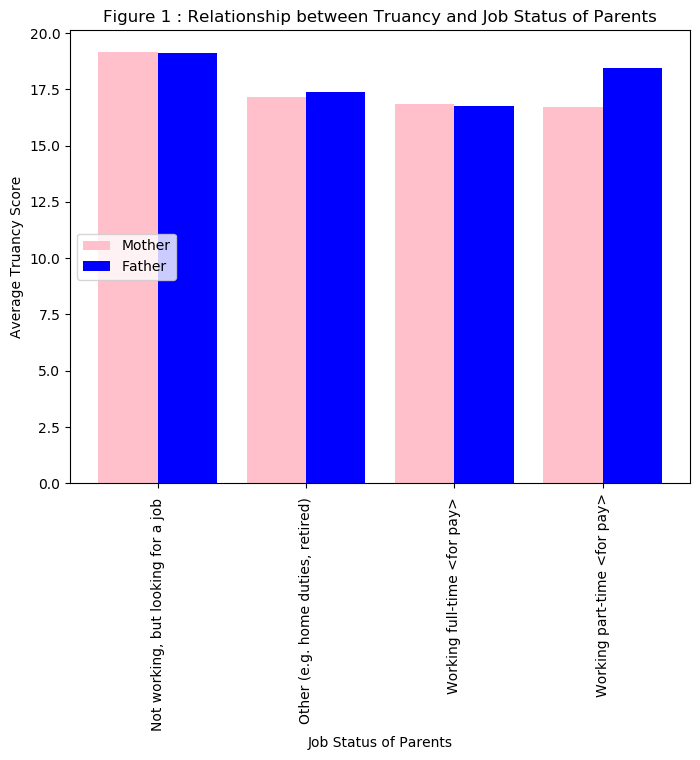

In [68]:

mother = truancy.groupby(['ST15Q01'])['Score'].mean()
father = truancy.groupby(['ST19Q01'])['Score'].mean()

plt.figure(figsize=(8, 6), dpi=100)

X = list(mother.index)
Y = list(father.index)
Xvalues = mother.values
Yvalues = father.values

X_axis = np.arange(0,4)
plt.bar(X_axis - 0.2, Xvalues, 0.4, label = 'Mother', color='pink')
plt.bar(X_axis + 0.2, Yvalues, 0.4, label = 'Father',color='blue')
plt.xticks(X_axis, X, rotation=90)
plt.legend(loc=6)
  
plt.xlabel("Job Status of Parents")
plt.ylabel("Average Truancy Score")
plt.title("Figure 1 : Relationship between Truancy and Job Status of Parents");

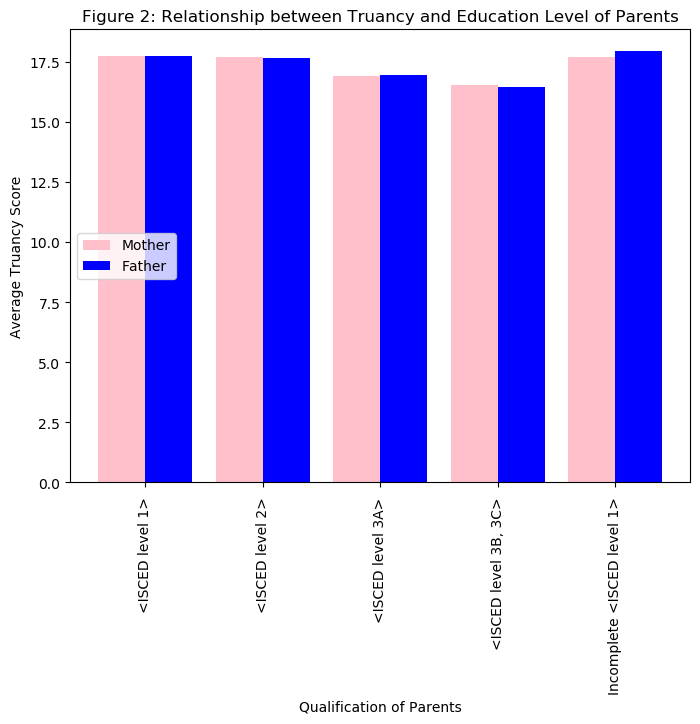

In [67]:
mother2 = truancy.groupby(['ST13Q01'])['Score'].mean()
father2 = truancy.groupby(['ST17Q01'])['Score'].mean()


plt.figure(figsize=(8, 6), dpi=100)
X = list(mother2.index)
Y = list(father2.index)
Xvalues = mother2.values
Yvalues = father2.values

X_axis = np.arange(0,5)
plt.bar(X_axis - 0.2, Xvalues, 0.4, label = 'Mother', color='pink')
plt.bar(X_axis + 0.2, Yvalues, 0.4, label = 'Father',color='blue')
plt.xticks(X_axis, X, rotation=90)
plt.legend(loc=6)

  
plt.xlabel("Qualification of Parents")
plt.ylabel("Average Truancy Score")
plt.title("Figure 2: Relationship between Truancy and Education Level of Parents");

#### Explanation

Based on the Multiple bar charts found in Figure 1 and Figure 2 above for both parents (father and mother), the following insights can be inferred: 

+ Parents who are working full time have kids with a lower truancy score, the result is slightly lower for fathers who are working full time. 

+ While there is a low truancy score for mothers who are working part-time, the score is higher when fathers are working part-time

+ Unemployed parents have a negative influence on the truancy score of their children as this category has the highest average truancy score. 


In addition, the impact of the educational qualifications of parents on their children were also examined using multiple barcharts as well. 

+ Parents who did not complete their primary education (ISCED 1) tend to have children with the highest truancy score. The effect is more in fathers than in mothers

+ Based on the chart in Figure 2 above, the turancy score tend to reduce as educational qualification increases. 

The breakdown on ISCED Educational Levels can be found [here](https://datatopics.worldbank.org/education/wRsc/classification)

#### Research Question 2 : Is there a relationship between possesion and average reading scores of students. 

First the average reading scores of students is computed and then the possible impact of certain posessions on average reading scores is examined. The possesions used to answer this question are: 

+ Literature
+ Poetry

The reading scores (PV1READ to PV5READ) is scaled to one reading score value with 100 being the highest and 0 being the lowest. An histogram is computed to check for the average reading score of the students. 

In [54]:
possesion_reading = data[['PV1READ','PV2READ','PV3READ','PV4READ','PV5READ','ST26Q07','ST26Q08']]

In [55]:
values = possesion_reading['PV1READ'] + possesion_reading['PV2READ'] + possesion_reading['PV3READ'] + possesion_reading['PV4READ'] + possesion_reading['PV5READ']
values_pct = round(values/values.max()*100)
possesion_reading['Reading_Score'] = values_pct
possesion_reading.rename(columns = {'ST26Q07':'Literature', 'ST26Q08':'Poetry','ST26Q09':'Art','ST26Q10':'Textbooks'}, inplace = True)
possesion_reading = possesion_reading.drop(['PV1READ','PV2READ','PV3READ','PV4READ','PV5READ'],1)

In [64]:
possesion_reading.Reading_Score.describe()

count    485490.000000
mean         55.571202
std          11.642974
min           1.000000
25%          48.000000
50%          56.000000
75%          64.000000
max         100.000000
Name: Reading_Score, dtype: float64

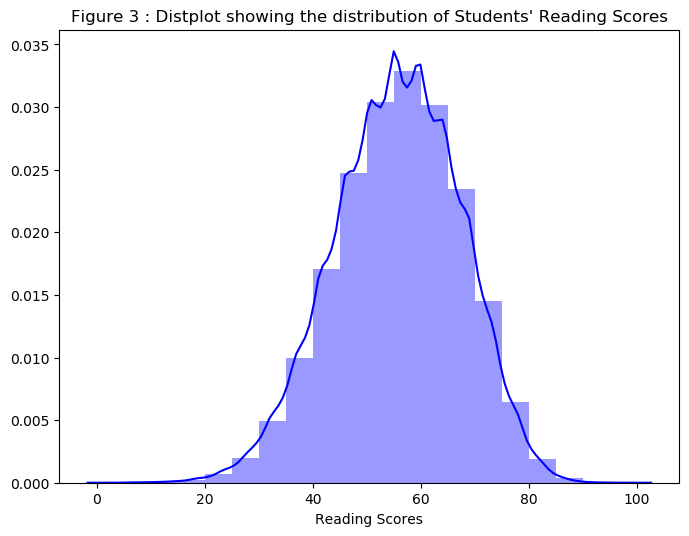

In [66]:
plt.figure(figsize=(8, 6), dpi=100)

bins = np.arange(0,possesion_reading.Reading_Score.max()+5,5)
sns.distplot(possesion_reading.Reading_Score, bins=bins, color='blue')
plt.title("Figure 3 : Distplot showing the distribution of Students' Reading Scores")
plt.xlabel("Reading Scores");

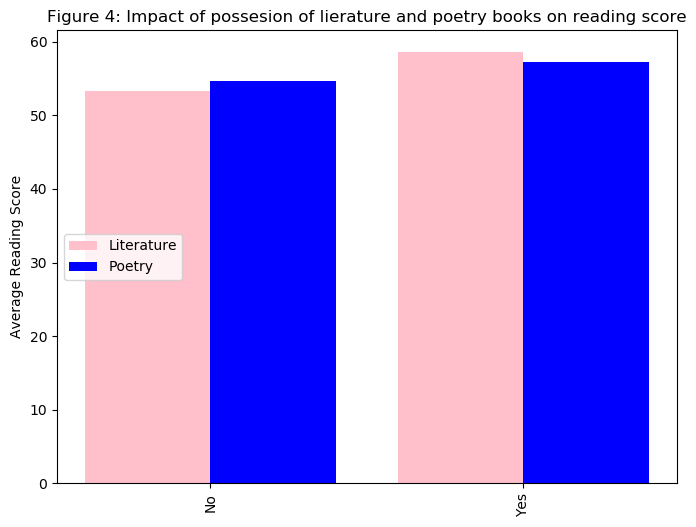

In [69]:
plt.figure(figsize=(8, 6), dpi=100)

lit = possesion_reading.groupby(['Literature'])['Reading_Score'].mean()
poet = possesion_reading.groupby(['Poetry'])['Reading_Score'].mean()

X = list(lit.index)
Y = list(poet.index)
Xvalues = lit.values
Yvalues = poet.values

X_axis = np.arange(0,2)
plt.bar(X_axis - 0.2, Xvalues, 0.4, label = 'lit', color='pink')
plt.bar(X_axis + 0.2, Yvalues, 0.4, label = 'poet',color='blue')
plt.xticks(X_axis, X, rotation=90)
plt.legend(['Literature','Poetry'],loc=6)
  
plt.ylabel("Average Reading Score")
plt.title("Figure 4: Impact of possesion of lierature and poetry books on reading score");

#### Explanation

Each reading score were combined into a singular score representing the overall reading score of each student in percentage. Based on the Distplot in Figure 3 (which is a combination of a histogram and a KDE plot), the distribution of reading scores follows a normal distribution i.e. it is symmetric. The average scores fall between 50% and 60% and this is true for the Mean, Median and Mode of the scores. 

The Multiple Barchart in Figure 4 shows that students with posessions (Literature Books and Poetry Books) performed better in the reading tests than those who don't have them. Also, students who possess literature perform better than those who possess poetry. 